# Portfolio Analytics

This iPython notebook serves to provide simple but important stock price insights using stock portfolio history data from the excel file located in the same directory. It imports real-time stock data using the yahoo-finance python module and is uses simple difference analysis to see which shares are doing well. 
https://pypi.python.org/pypi/yahoo-finance  

In [1]:
import pandas as pd
import yahoo_finance # https://pypi.python.org/pypi/yahoo-finance, https://github.com/lukaszbanasiak/yahoo-finance
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab inline
#pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
import seaborn as sns
sns.set(color_codes=True)

#cheat sheets 
# http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import personal data from portfolio.xlsx
raw_data = pd.read_excel('portfolio.xlsx')
stock_data = raw_data.set_index("stock")
stock_data

,price-paid,quantity
stock,,
BAC,21.1000,3
SNAP,25.9600,4
TWTR,18.1400,1
SKLN,1.8900,1
FIT,6.0900,1
HOTRW,0.1740,1
AXARW,0.0722,1


In [3]:
# Get prices from Yahoo-Finance 
shares = [yahoo_finance.Share(str(stock)) for stock in stock_data.index]
current_prices = [share.get_price() for share in shares]
stock_prices = {str(k): float(v) for k, v in zip(stock_data.index, current_prices)}
print (stock_prices)

{'BAC': 24.06, 'SNAP': 20.74, 'TWTR': 19.22, 'SKLN': 1.8599, 'FIT': 5.795, 'HOTRW': 0.14, 'AXARW': 0.07}


In [4]:
df2 = pd.DataFrame({'price_paid' : stock_data['price-paid'], 
                    'current_price': [float(price) for price in current_prices],
                    'quantity' : stock_data['quantity']
                    })

price_differentials = [(x - y) for x, y in zip(df2['current_price'], df2['price_paid'])]
df2.insert(0, 'stock', stock_data.index)
df2.insert(3, 'price_diff', price_differentials)
df2.insert(5, 'values', df2['current_price']*df2['quantity'])
df2.insert(6, 'total_invested', df2['price_paid']*df2['quantity'])
df2.insert(7, 'total_return', stock_data['quantity'] * df2['price_diff'])
master_data = df2.set_index('stock')
master_data

,current_price,price_paid,price_diff,quantity,values,total_invested,total_return
stock,,,,,,,
BAC,24.0600,21.1000,2.9600,3,72.1800,63.3000,8.8800
SNAP,20.7400,25.9600,-5.2200,4,82.9600,103.8400,-20.8800
TWTR,19.2200,18.1400,1.0800,1,19.2200,18.1400,1.0800
SKLN,1.8599,1.8900,-0.0301,1,1.8599,1.8900,-0.0301
FIT,5.7950,6.0900,-0.2950,1,5.7950,6.0900,-0.2950
HOTRW,0.1400,0.1740,-0.0340,1,0.1400,0.1740,-0.0340
AXARW,0.0700,0.0722,-0.0022,1,0.0700,0.0722,-0.0022


In [5]:
stock = master_data['values'].sum()

def totalAssets(df3, not_invested): 
    return master_data['total_invested'].sum() + not_invested

buying_power = .02
totalAssets = totalAssets(stock_data, buying_power)

df = pd.DataFrame({'total_assets':  [totalAssets], 
                    'stock_valuation':  [stock]})
df

,stock_valuation,total_assets
0,182.2249,193.5262


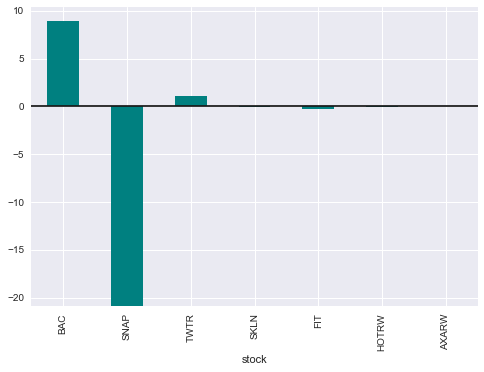

In [6]:
master_data['total_return'].plot(kind='bar', color= 'teal'); plt.axhline(0, color='k')

In [8]:
profit = 0
positive_profit = 0 
print ('stocks I can sell:')
for stock in master_data.index:
    value = master_data.at[str(stock), 'total_return']
    profit += value
    if (value > 0): positive_profit+= value
    if (value > 0): print (stock, 'profit would be:', '$', value)
     
print('positive stock profit:', '$',positive_profit)

print()        
if profit < 0: print ('rip, you have a negative portfolio')
else: print('Dude nice! Positive Portfolio boys!')
print ('expected profit: ', profit)

stocks I can sell:
BAC profit would be: $ 8.88
TWTR profit would be: $ 1.08
positive stock profit: $ 9.96

rip, you have a negative portfolio
expected profit:  -11.2813


Mechanism idea:   
1) Check if return is positive, curent_price > price_paid  
2) Check if the price of the share is close to the 52-week high.   
3) If the price of the share is closer to the price of the 52 week high than in the last 12 months, then sell.   